In [1]:
import mysql.connector
import pandas as pd

db_config = {
    'host' : 'localhost',
    'user' : 'root',
    'password' : '730203',
    'database' : 'emoji'
}

In [5]:
connection = mysql.connector.connect(**db_config)
query = """
SELECT chat_list.sender, chat_list.receiver, chat_list.date, chat_list.emoji, emoji_list.emoji_name
FROM chat_list
JOIN emoji_list ON chat_list.emoji = emoji_list.emoji
ORDER BY chat_list.date ASC;
"""

In [6]:
chat_data = pd.read_sql_query(query, connection)

In [7]:
chat_data

,sender,receiver,date,emoji,emoji_name
0,금탱이🪙,김성연,2021-03-04 16:57:00,💕,two hearts
1,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart
2,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart
3,금탱이🪙,김성연,2021-03-04 17:02:00,😊,smiling face with smiling eyes
4,김성연,금탱이🪙,2021-03-04 17:07:00,😻,smiling cat with heart-eyes
...,...,...,...,...,...
1452,김성연,금탱이🪙,2023-08-10 09:59:00,😢,crying face
1453,24기 유진씌,김성연,2023-08-11 02:10:00,🥲,smiling face with tear
1454,24기 유진씌,김성연,2023-08-11 02:10:00,😌,relieved face
1455,24기 유진씌,김성연,2023-08-11 02:10:00,😌,relieved face


In [8]:
connection.close()

In [9]:
merge_emoji_name = []
for sender in chat_data['sender'].unique():
    sender_data = chat_data[chat_data['sender'] == sender]
    for receiver in sender_data['receiver'].unique():
        sender_receiver_data = sender_data[sender_data['receiver'] == receiver]
        merged_text = ''
        for _, row in sender_receiver_data.iterrows():
            merged_text += f"[{row['date']}] {row['emoji_name']} "
        merge_emoji_name.append([sender, receiver, merged_text.strip()])
    
merge_data = pd.DataFrame(merge_emoji_name, columns=['sender', 'receiver', 'merge_emoji_name'])

In [10]:
merge_data

,sender,receiver,merge_emoji_name
0,금탱이🪙,김성연,[2021-03-04 16:57:00] two hearts [2021-03-04 1...
1,김성연,금탱이🪙,[2021-03-04 17:00:00] blue heart [2021-03-04 1...
2,김성연,앰배서더 22기 정예린언니,[2021-03-04 17:14:00] blue heart [2021-03-04 1...
3,김성연,24기 유진씌,[2021-03-26 21:05:00] blue heart [2021-03-26 2...
4,김성연,상원,[2021-04-28 23:47:00] cherry blossom [2021-04-...
5,김성연,정연 언니🐥,[2021-11-18 06:54:00] pleading face [2021-11-1...
6,김성연,유재혁,[2022-12-07 22:19:00] pleading face [2023-02-0...
7,24기 유진씌,김성연,[2021-03-26 21:15:00] person cartwheeling [202...
8,상원,김성연,[2021-04-26 17:57:00] clapping hands [2021-04-...
9,앰배서더 22기 정예린언니,김성연,[2021-05-15 20:28:00] white heart [2021-06-01 ...


In [11]:
merge_data['merge_emoji_name'].iloc[0]

'[2021-03-04 16:57:00] two hearts [2021-03-04 17:02:00] smiling face with smiling eyes [2021-03-05 00:10:00] white heart [2021-03-08 23:38:00] blue heart [2021-03-11 22:23:00] blue heart [2021-03-12 12:49:00] face blowing a kiss [2021-03-15 02:11:00] blue heart [2021-03-26 20:14:00] cherry blossom [2021-04-10 22:14:00] partying face [2021-04-10 22:14:00] partying face [2021-04-22 22:28:00] growing heart [2021-08-14 21:00:00] smiling face with hearts [2021-08-14 21:00:00] squinting face with tongue [2021-08-23 15:54:00] blue heart [2021-10-01 01:33:00] smiling face with heart-eyes [2021-11-19 21:14:00] smiling face with hearts [2021-11-20 23:12:00] smiling face with heart-eyes [2021-11-20 23:12:00] smiling face with heart-eyes [2021-11-20 23:12:00] smiling face with heart-eyes [2022-01-01 09:25:00] smiling face with heart-eyes [2022-03-08 20:03:00] smiling face with hearts [2022-03-08 20:03:00] blue heart [2022-03-08 20:03:00] blue heart [2022-03-11 19:21:00] blue heart [2022-03-11 23:1

In [12]:
import numpy as np
import os

In [13]:
folder_path = 'love_letters'
file_list = os.listdir(folder_path)
letters = []

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'r', encoding='utf8') as f:
        letter = f.read()
        letters.append(letter)
        
print(len(letters))

88


In [14]:
letters[0]

'My Dearest Friend,\n…should I draw you the picture of my heart it would be what I hope you would still love though it contained nothing new.\xa0 The early \npossession you obtained there, and the absolute power you have obtained over it, leaves not the smallest space unoccupied.\nI look back to the early days of our acquaintance and friendship as to the days of love and innocence, and, with an indescribable \npleasure, I have seen near a score of years roll over our heads with an affection heightened and improved by time, nor have the dreary \nyears of absence in the smallest degree effaced from my mind the image of the dear untitled man to whom I gave my heart.'

In [15]:
import re
from nltk.corpus import stopwords
from nltk import FreqDist

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
# 데이터 정제
def preprocess_text(letters):
    for i in range(len(letters)):
        letter = letters[i]
        letter = re.sub(r"\n", " ", letter)
        letter = re.sub(r"[^a-zA-Z ]", " ", letter).lower()
        letter = [word for word in letter.split() if len(word) > 3]
        letter = [word for word in letter if word not in stop_words]
        letters[i] = letter
    return letters

In [18]:
preprocess_text(letters)

[['dearest',
  'friend',
  'draw',
  'picture',
  'heart',
  'would',
  'hope',
  'would',
  'still',
  'love',
  'though',
  'contained',
  'nothing',
  'early',
  'possession',
  'obtained',
  'absolute',
  'power',
  'obtained',
  'leaves',
  'smallest',
  'space',
  'unoccupied',
  'look',
  'back',
  'early',
  'days',
  'acquaintance',
  'friendship',
  'days',
  'love',
  'innocence',
  'indescribable',
  'pleasure',
  'seen',
  'near',
  'score',
  'years',
  'roll',
  'heads',
  'affection',
  'heightened',
  'improved',
  'time',
  'dreary',
  'years',
  'absence',
  'smallest',
  'degree',
  'effaced',
  'mind',
  'image',
  'dear',
  'untitled',
  'gave',
  'heart'],
 ['dear',
  'sarah',
  'indications',
  'strong',
  'shall',
  'move',
  'days',
  'perhaps',
  'tomorrow',
  'lest',
  'able',
  'write',
  'feel',
  'impelled',
  'write',
  'lines',
  'fall',
  'shall',
  'movement',
  'days',
  'duration',
  'full',
  'pleasure',
  'severe',
  'conflict',
  'death',
  'thin

In [19]:
letters[0]

['dearest',
 'friend',
 'draw',
 'picture',
 'heart',
 'would',
 'hope',
 'would',
 'still',
 'love',
 'though',
 'contained',
 'nothing',
 'early',
 'possession',
 'obtained',
 'absolute',
 'power',
 'obtained',
 'leaves',
 'smallest',
 'space',
 'unoccupied',
 'look',
 'back',
 'early',
 'days',
 'acquaintance',
 'friendship',
 'days',
 'love',
 'innocence',
 'indescribable',
 'pleasure',
 'seen',
 'near',
 'score',
 'years',
 'roll',
 'heads',
 'affection',
 'heightened',
 'improved',
 'time',
 'dreary',
 'years',
 'absence',
 'smallest',
 'degree',
 'effaced',
 'mind',
 'image',
 'dear',
 'untitled',
 'gave',
 'heart']

In [20]:
flattened_letters = [word for letter in letters for word in letter]
word_freq = FreqDist(flattened_letters)
word_freq

FreqDist({'love': 178, 'shall': 72, 'heart': 63, 'know': 59, 'never': 57, 'would': 55, 'much': 51, 'cannot': 45, 'could': 44, 'ever': 44, ...})

In [21]:
sorted_word_freq = sorted(word_freq, key=word_freq.get, reverse=True)
print(len(sorted_word_freq))

2804


In [22]:
sorted_word_freq

['love',
 'shall',
 'heart',
 'know',
 'never',
 'would',
 'much',
 'cannot',
 'could',
 'ever',
 'feel',
 'life',
 'like',
 'think',
 'dear',
 'must',
 'little',
 'give',
 'want',
 'write',
 'every',
 'tell',
 'nothing',
 'upon',
 'letter',
 'long',
 'last',
 'said',
 'without',
 'great',
 'even',
 'always',
 'dearest',
 'time',
 'kiss',
 'things',
 'still',
 'years',
 'night',
 'many',
 'live',
 'perhaps',
 'come',
 'days',
 'happiness',
 'well',
 'soul',
 'often',
 'words',
 'since',
 'letters',
 'hope',
 'death',
 'darling',
 'loved',
 'thought',
 'place',
 'good',
 'everything',
 'mind',
 'thousand',
 'till',
 'take',
 'mine',
 'true',
 'thee',
 'world',
 'beautiful',
 'mother',
 'make',
 'anything',
 'believe',
 'enough',
 'pleasure',
 'affection',
 'part',
 'whole',
 'moment',
 'word',
 'thoughts',
 'morning',
 'look',
 'sweet',
 'beauty',
 'dream',
 'wish',
 'happy',
 'husband',
 'eyes',
 'lips',
 'longer',
 'arms',
 'though',
 'find',
 'forget',
 'remember',
 'cold',
 'sometim

In [23]:
scores = np.linspace(0, 100, len(sorted_word_freq))
scores = [round(score, 2) for score in scores]
scores = sorted(scores, reverse=True)
scores

[100.0,
 99.96,
 99.93,
 99.89,
 99.86,
 99.82,
 99.79,
 99.75,
 99.71,
 99.68,
 99.64,
 99.61,
 99.57,
 99.54,
 99.5,
 99.46,
 99.43,
 99.39,
 99.36,
 99.32,
 99.29,
 99.25,
 99.22,
 99.18,
 99.14,
 99.11,
 99.07,
 99.04,
 99.0,
 98.97,
 98.93,
 98.89,
 98.86,
 98.82,
 98.79,
 98.75,
 98.72,
 98.68,
 98.64,
 98.61,
 98.57,
 98.54,
 98.5,
 98.47,
 98.43,
 98.39,
 98.36,
 98.32,
 98.29,
 98.25,
 98.22,
 98.18,
 98.14,
 98.11,
 98.07,
 98.04,
 98.0,
 97.97,
 97.93,
 97.9,
 97.86,
 97.82,
 97.79,
 97.75,
 97.72,
 97.68,
 97.65,
 97.61,
 97.57,
 97.54,
 97.5,
 97.47,
 97.43,
 97.4,
 97.36,
 97.32,
 97.29,
 97.25,
 97.22,
 97.18,
 97.15,
 97.11,
 97.07,
 97.04,
 97.0,
 96.97,
 96.93,
 96.9,
 96.86,
 96.82,
 96.79,
 96.75,
 96.72,
 96.68,
 96.65,
 96.61,
 96.58,
 96.54,
 96.5,
 96.47,
 96.43,
 96.4,
 96.36,
 96.33,
 96.29,
 96.25,
 96.22,
 96.18,
 96.15,
 96.11,
 96.08,
 96.04,
 96.0,
 95.97,
 95.93,
 95.9,
 95.86,
 95.83,
 95.79,
 95.75,
 95.72,
 95.68,
 95.65,
 95.61,
 95.58,
 95.54,
 95.5

In [24]:
word_score = {
    'word' : sorted_word_freq,
    'score' : scores
}
love_word_score = pd.DataFrame(word_score)
love_word_score

,word,score
0,love,100.00
1,shall,99.96
2,heart,99.93
3,know,99.89
4,never,99.86
...,...,...
2799,embalmed,0.14
2800,closer,0.11
2801,listen,0.07
2802,profoundly,0.04


In [25]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

In [26]:
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename='glove.6B.zip')
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall()
zf.close()

In [27]:
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding='utf8')

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr

f.close()

In [28]:
len(embedding_dict)

400000

In [29]:
love_word_score['embedding'] = love_word_score['word'].map(embedding_dict)

In [30]:
#embedding vector가 존재하지 않는 word는 데이터프레임에서 삭제
love_word_score.dropna(subset=['embedding'], inplace=True)

In [31]:
love_word_score

,word,score,embedding
0,love,100.00,"[0.25975, 0.55833, 0.57986, -0.21361, 0.13084,..."
1,shall,99.96,"[-0.10439, 0.083304, 0.13294, -0.16866, -0.082..."
2,heart,99.93,"[0.022703, 0.2415, 0.16435, 0.091409, 0.10478,..."
3,know,99.89,"[0.19073, 0.56864, 0.72027, -0.66038, -1.119, ..."
4,never,99.86,"[0.28308, 0.3328, 0.50003, -0.2043, -0.34403, ..."
...,...,...,...
2799,embalmed,0.14,"[0.34325, -0.30457, 0.33898, 0.27471, -0.20363..."
2800,closer,0.11,"[0.26559, 0.71073, 0.88938, 0.57834, 0.44369, ..."
2801,listen,0.07,"[-0.29908, 0.41578, 0.66219, -0.25691, -0.2149..."
2802,profoundly,0.04,"[-0.28895, 0.54663, 0.070209, 0.28935, -0.3877..."


In [32]:
import re

In [33]:
def preprocess_chat_data(text):
    return re.sub(r'[^a-zA-Z ]', ' ', text)

chat_data['emoji_name'] = chat_data['emoji_name'].apply(preprocess_chat_data)

In [34]:
chat_data

,sender,receiver,date,emoji,emoji_name
0,금탱이🪙,김성연,2021-03-04 16:57:00,💕,two hearts
1,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart
2,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart
3,금탱이🪙,김성연,2021-03-04 17:02:00,😊,smiling face with smiling eyes
4,김성연,금탱이🪙,2021-03-04 17:07:00,😻,smiling cat with heart eyes
...,...,...,...,...,...
1452,김성연,금탱이🪙,2023-08-10 09:59:00,😢,crying face
1453,24기 유진씌,김성연,2023-08-11 02:10:00,🥲,smiling face with tear
1454,24기 유진씌,김성연,2023-08-11 02:10:00,😌,relieved face
1455,24기 유진씌,김성연,2023-08-11 02:10:00,😌,relieved face


In [35]:
def get_embeddings(text):
    embeddings = []
    for word in text.split():
        embeddings.append(embedding_dict.get(word, None))
    return embeddings

In [36]:
chat_data['embedding'] = chat_data['emoji_name'].apply(get_embeddings)
chat_data

,sender,receiver,date,emoji,emoji_name,embedding
0,금탱이🪙,김성연,2021-03-04 16:57:00,💕,two hearts,"[[-0.20154, 0.32739, 0.0004758, -0.22452, 0.44..."
1,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart,"[[0.086431, 0.79661, -0.020265, -0.56314, 0.50..."
2,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart,"[[0.086431, 0.79661, -0.020265, -0.56314, 0.50..."
3,금탱이🪙,김성연,2021-03-04 17:02:00,😊,smiling face with smiling eyes,"[[0.30926, 0.28599, 0.4542, -0.16535, 0.26693,..."
4,김성연,금탱이🪙,2021-03-04 17:07:00,😻,smiling cat with heart eyes,"[[0.30926, 0.28599, 0.4542, -0.16535, 0.26693,..."
...,...,...,...,...,...,...
1452,김성연,금탱이🪙,2023-08-10 09:59:00,😢,crying face,"[[0.84979, 0.34748, 0.18463, -0.22162, -0.5741..."
1453,24기 유진씌,김성연,2023-08-11 02:10:00,🥲,smiling face with tear,"[[0.30926, 0.28599, 0.4542, -0.16535, 0.26693,..."
1454,24기 유진씌,김성연,2023-08-11 02:10:00,😌,relieved face,"[[-0.4817, -0.2258, 0.22702, -0.35931, -1.0344..."
1455,24기 유진씌,김성연,2023-08-11 02:10:00,😌,relieved face,"[[-0.4817, -0.2258, 0.22702, -0.35931, -1.0344..."


In [37]:
#embedding 열의 null 값 제거
for i in range(len(chat_data)):
    chat_data['embedding'].iloc[i] = [embedding for embedding in chat_data['embedding'].iloc[i] if embedding is not None]

In [38]:
#embedding 열이 빈 리스트인 행 제거
chat_data = chat_data[chat_data['embedding'].apply(lambda x: len(x) > 0)]

In [39]:
len(chat_data)

1457

In [40]:
from numpy import dot
from numpy.linalg import norm

In [41]:
def cal_cosine_similarity(A, B):
    return dot(A, B) / (norm(A)*norm(B))

In [42]:
def cal_score(embeddings):
    result_scores = []
    for embedding in embeddings:
        similarity = []
        for love_word_embedding in love_word_score['embedding'].tolist():
            similarity.append(cal_cosine_similarity(embedding, love_word_embedding))
        max_similarity = max(similarity)
        max_index = similarity.index(max_similarity)
        score = love_word_score['score'].iloc[max_index]
        result_score = max_similarity * score
        result_scores.append(result_score)
    return sum(result_scores) / len(result_scores)

In [43]:
chat_data['love_score'] = chat_data['embedding'].apply(cal_score)

In [44]:
chat_data

,sender,receiver,date,emoji,emoji_name,embedding,love_score
0,금탱이🪙,김성연,2021-03-04 16:57:00,💕,two hearts,"[[-0.20154, 0.32739, 0.0004758, -0.22452, 0.44...",92.359973
1,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart,"[[0.086431, 0.79661, -0.020265, -0.56314, 0.50...",94.024992
2,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart,"[[0.086431, 0.79661, -0.020265, -0.56314, 0.50...",94.024992
3,금탱이🪙,김성연,2021-03-04 17:02:00,😊,smiling face with smiling eyes,"[[0.30926, 0.28599, 0.4542, -0.16535, 0.26693,...",77.224765
4,김성연,금탱이🪙,2021-03-04 17:07:00,😻,smiling cat with heart eyes,"[[0.30926, 0.28599, 0.4542, -0.16535, 0.26693,...",78.282539
...,...,...,...,...,...,...,...
1452,김성연,금탱이🪙,2023-08-10 09:59:00,😢,crying face,"[[0.84979, 0.34748, 0.18463, -0.22162, -0.5741...",49.264590
1453,24기 유진씌,김성연,2023-08-11 02:10:00,🥲,smiling face with tear,"[[0.30926, 0.28599, 0.4542, -0.16535, 0.26693,...",73.151134
1454,24기 유진씌,김성연,2023-08-11 02:10:00,😌,relieved face,"[[-0.4817, -0.2258, 0.22702, -0.35931, -1.0344...",70.201143
1455,24기 유진씌,김성연,2023-08-11 02:10:00,😌,relieved face,"[[-0.4817, -0.2258, 0.22702, -0.35931, -1.0344...",70.201143


In [59]:
sub_chat_data = chat_data[(chat_data['sender'] == '김성연') & (chat_data['receiver'] == '24기 유진씌')]
sub_chat_data['love_score'] = sub_chat_data.groupby('date')['love_score'].transform('mean')

In [60]:
sub_chat_data

,sender,receiver,date,emoji,emoji_name,embedding,love_score
1,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart,"[[0.086431, 0.79661, -0.020265, -0.56314, 0.50...",94.024992
2,김성연,금탱이🪙,2021-03-04 17:00:00,💙,blue heart,"[[0.086431, 0.79661, -0.020265, -0.56314, 0.50...",94.024992
4,김성연,금탱이🪙,2021-03-04 17:07:00,😻,smiling cat with heart eyes,"[[0.30926, 0.28599, 0.4542, -0.16535, 0.26693,...",78.282539
9,김성연,금탱이🪙,2021-03-06 01:29:00,😻,smiling cat with heart eyes,"[[0.30926, 0.28599, 0.4542, -0.16535, 0.26693,...",78.282539
10,김성연,금탱이🪙,2021-03-06 01:34:00,💙,blue heart,"[[0.086431, 0.79661, -0.020265, -0.56314, 0.50...",94.024992
...,...,...,...,...,...,...,...
1219,김성연,금탱이🪙,2023-03-22 16:30:00,💖,sparkling heart,"[[0.20387, 0.14953, 0.49425, 0.1807, 0.33663, ...",75.049323
1269,김성연,금탱이🪙,2023-04-25 00:09:00,🥲,smiling face with tear,"[[0.30926, 0.28599, 0.4542, -0.16535, 0.26693,...",73.151134
1442,김성연,금탱이🪙,2023-07-29 22:30:00,💖,sparkling heart,"[[0.20387, 0.14953, 0.49425, 0.1807, 0.33663, ...",75.049323
1451,김성연,금탱이🪙,2023-08-09 08:55:00,😢,crying face,"[[0.84979, 0.34748, 0.18463, -0.22162, -0.5741...",49.264590


In [51]:
import matplotlib.pyplot as plt

%matplotlib inline

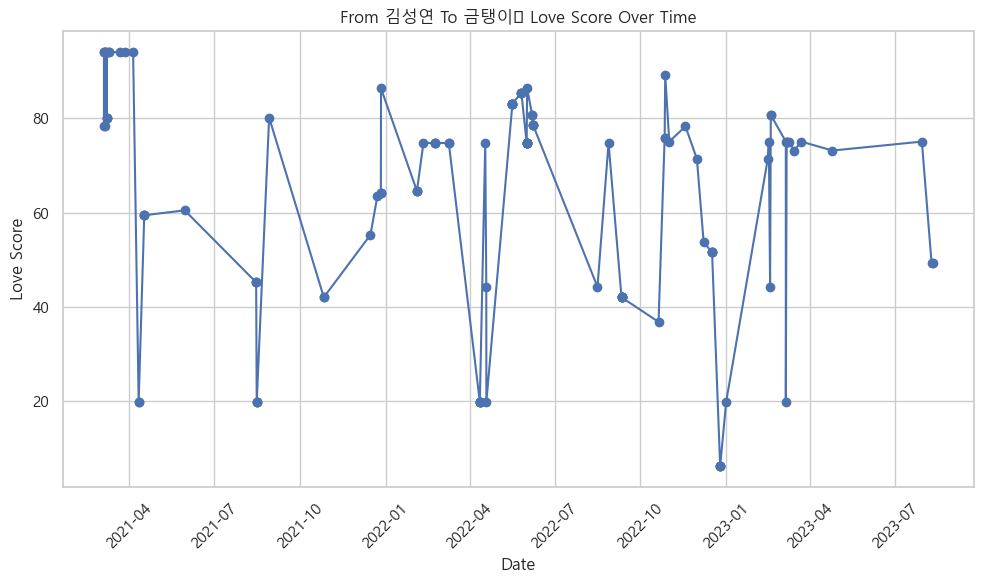

In [61]:
plt.figure(figsize=(10, 6))
plt.rc('font', family='Malgun Gothic')
plt.plot(sub_chat_data['date'], sub_chat_data['love_score'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Love Score')
plt.title('From ' + sub_chat_data['sender'].iloc[0] + ' To ' + sub_chat_data['receiver'].iloc[0] + ' Love Score Over Time')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()